In [3]:
import numpy as np

In [4]:
x = np.random.uniform(0.0, 5.0, 250)
print(x)

[3.56254666 3.79715983 1.23046416 4.33024897 3.68610023 4.02837241
 4.5556129  0.71914972 1.83237289 4.75002704 3.65443833 0.94252505
 1.21087702 0.9377532  0.92893241 1.77741082 2.35610604 3.47114905
 2.2385161  4.96011616 2.0372165  0.76836147 3.81905596 2.08706365
 0.16491926 4.03514365 0.24916629 2.81291303 1.3322013  2.52598784
 1.21104073 4.91577735 4.97108133 4.43130698 2.29329592 0.47037877
 1.22442523 0.69628312 3.54317008 2.11961648 3.90407488 3.64088767
 2.07144417 1.74394825 1.70895358 3.92051847 3.95417997 0.28108893
 1.42410153 0.93588602 1.77779051 1.19547782 3.1875946  3.24215129
 0.43128247 3.33480635 3.97531433 3.54596027 4.08524613 3.47714473
 3.47103636 1.72900024 1.22904999 1.97143768 1.68826646 0.42425432
 3.11668012 3.43968006 3.03220124 2.89225555 0.71742155 1.6908341
 4.21473375 1.49348496 0.2206609  0.85719573 0.84465042 0.45393092
 0.04120777 3.67822652 4.3830853  1.30386329 4.25463031 0.82758054
 4.64998747 4.37140545 4.69474033 3.84384346 0.06032863 3.57809

In [5]:
import matplotlib.pyplot as plt

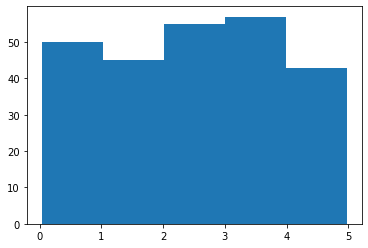

In [6]:
plt.hist(x, bins=5)
plt.show()

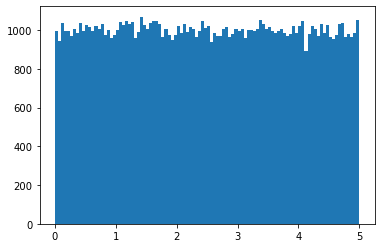

In [9]:
y = np.random.uniform(0.0, 5.0, 100000)
plt.hist(y, bins=100)
plt.show()

Normal Data Distribution

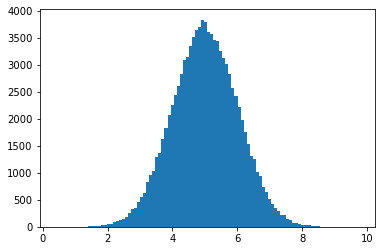

In [12]:
z = np.random.normal(5.0, 1.0, 100000)
plt.hist(z, 100)
plt.show()

Scatter plots with Data Distribution